#### Install MATES and required packages

In [ ]:
%%bash
git clone https://github.com/mcgilldinglab/MATES.git
conda create -n mates_env python=3.9
conda activate mates_env
conda install -c bioconda samtools
pip install pysam
conda install -c bioconda bedtools
pip install pybedtools
cd MATES
pip install .

conda install ipykernel
python -m ipykernel install --user --name=mates_env

Cloning into 'MATES'...


In [1]:
import warnings
warnings.filterwarnings("ignore")

**Download the sample data to the same folder of this notebook.**

#### Build TE reference (this may takes a few minutes)

In [ ]:
%%bash
### Edit the path to build_reference.py according to where you place this notebook
python ../build_reference.py --species Mouse

#### Process aligned bam files

In [3]:
from MATES import bam_processor

In [ ]:
bam_processor.split_count_10X_data('exclusive', 'test_samplelist.txt', 'test_bam_path.txt','test_cb_path.txt',bc_ind = 'CR', ref_path = 'TE_nooverlap.bed',num_threads=2)

#### Generate data for model

In [6]:
from MATES import data_processor

In [7]:
data_processor.calculate_UM_region('exclusive', '10X', 'test_samplelist.txt', bin_size=5, proportion=80, ref_path = 'Default', bc_path_file='test_cb_path.txt')

Directory MU_Stats created.
Start Calculating U/M region for cells in test...


100%|███████████████████████████████████████████| 50/50 [00:03<00:00, 13.16it/s]

Finish calculating U/M region for cells in test, finalizing...
Finish finalizing U/M region information for test.


In [8]:
data_processor.generate_training_sample('10X', 'test_samplelist.txt', bin_size=5, proportion=80)

Start generating training sample for unqiue read TE in test...
Finish analyse generating sample for unqiue read TE in test.
Start generating training sample for multi read TE in test...
Finish analyse generating sample for multi read TE in test.
Finish Sample test


In [9]:
data_processor.generate_prediction_sample('exclusive', '10X', 'test_samplelist.txt', bin_size=5, proportion=80, ref_path = 'Default', bc_path_file='test_cb_path.txt')

Directory MU_Stats created.
Start analyse full prediciton data of multi read...


100%|███████████████████████████████████████████| 50/50 [00:15<00:00,  4.21it/s]

(11445, 3)


100%|███████████████████████████████████████████| 50/50 [00:16<00:00,  3.08it/s]

Finish analyse full prediciton data of multi read.
Finish saving data for prediction.


#### Training and prediction

In [1]:
from MATES import MATES_model

CUDA device 'cuda:0' is available.
Data Mode:  10X
AE Settings:  Epoch:    150, Learning Rate: 0.000001
MLP Settings: Epoch:    150, Learning Rate: 0.000001
Batch Size:     36
Searching Bin Size:      5
Dominate Proportion:     80
Loading training data for test...
Training model for test...


100%|█████████████████████████████████████████| 150/150 [00:06<00:00, 23.06it/s]


Finish training model for test.


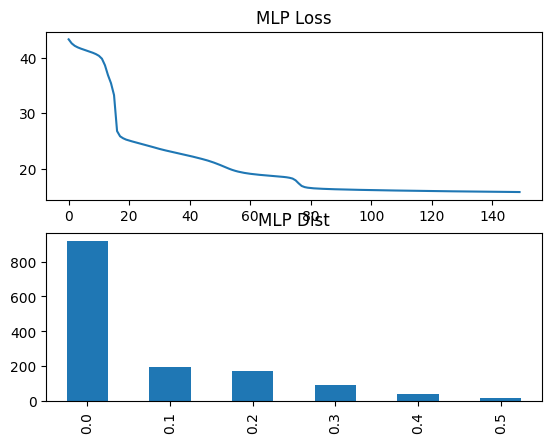

In [ ]:
MATES_model.train('10X', 'test_samplelist.txt', bin_size = 5, proportion = 80, BATCH_SIZE= 256, AE_LR = 1e-6, MLP_LR = 1e-6, AE_EPOCHS = 150, MLP_EPOCHS = 150, DEVICE= 'cuda:0')

In [7]:
MATES_model.prediction('exclusive', '10X', 'test_samplelist.txt', bin_size = 5, proportion = 80, AE_trained_epochs =150, MLP_trained_epochs=150, DEVICE= 'cuda:0', ref_path = 'Default')

CUDA device 'cuda:0' is available.
start calculating


 92%|███████████████████████████████████████▍   | 11/12 [00:00<00:00, 54.53it/s]
/mnt/md0/ruohan/anaconda3/envs/mates_env/lib/python3.9/site-packages/MATES/scripts/make_prediction.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['TE_index'] = tmp['TE_index'].astype(int)


Finish quantify Multi TE


#### TE quantification

In [9]:
from MATES import TE_quantifier

In [10]:
TE_quantifier.unique_TE_MTX('exclusive', '10X', 'test_samplelist.txt', 1, ref_path = 'Default', bc_path_file='test_cb_path.txt')

 98%|█████████▊| 49/50 [00:48<00:00,  1.36it/s]

Combining batchly quntified Unique TE MTX...
Finish finalizing Unique TE MTX.


100%|██████████| 50/50 [00:48<00:00,  1.02it/s]


In [11]:
TE_quantifier.finalize_TE_MTX('10X', 'test_samplelist.txt')

Start create TE_MTX for test ...
Finish create TE_MTX for  test


#### Locus-level TE quantification

In [ ]:
MATES_model.prediction_locus('exclusive', '10X', 'test_samplelist.txt', bin_size=5, proportion=80, AE_trained_epochs=150, MLP_trained_epochs=150, DEVICE= 'cuda:0', ref_path = 'Default')

In [12]:
TE_quantifier.quantify_locus_TE_MTX('exclusive', '10X', 'test_samplelist.txt')

Finish finalizing Unique TE MTX for test
Finalizing locus expression matrix for test...
Finis finalizing locus expression matrix for test.


/mnt/md0/ruohan/anaconda3/envs/mates_env/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/mnt/md0/ruohan/anaconda3/envs/mates_env/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/mnt/md0/ruohan/anaconda3/envs/mates_env/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/mnt/md0/ruohan/anaconda3/envs/mates_env/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/mnt/md0/ruohan/anaconda3/envs/mates_env/lib/python3.9/site-packages/sci